In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
data=pd.read_csv('/content/ADANIPORTS (1).csv')

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
data.shape

(3322, 15)

In [5]:
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [11]:
data.drop('Trades',axis=1,inplace=True)

In [12]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [13]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,2.241652e+07,0.979800


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 363.5+ KB


<Axes: >

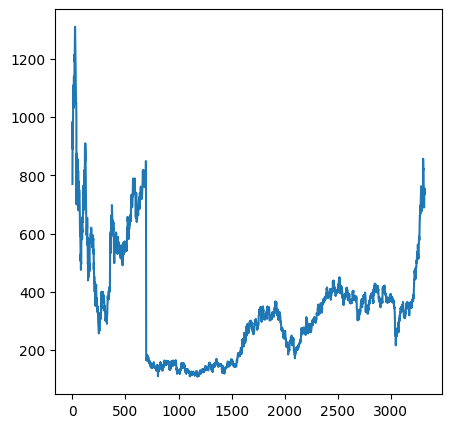

In [15]:
data['Open'].plot(figsize=(5,5))

In [16]:
x=data[['Open','High','Low','Volume']]
y=data['Close']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [20]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2657, 4) (665, 4)
(2657,) (665,)


In [21]:
lm=LinearRegression()

In [22]:
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
predicted=lm.predict(x_test)
predicted

array([ 387.23243037,  591.18432524,  355.08447317,  474.39319087,
        296.41562426,  598.14766127,  296.64380229, 1021.18375924,
        489.59572792,  354.70580316,  323.61372509,  317.95624619,
        261.9695993 ,  567.16449473,  359.44591162,  396.78829526,
        399.14773888,  381.01054838,  144.2205251 ,  350.13722347,
        335.54342045,  123.12377   ,  269.70880515,  407.91843961,
        152.95830292,  528.16254297,  555.04495282,  639.84981929,
        602.97523018,  286.95395815,  379.65931548,  421.03893587,
        286.45554697,  363.56252419,  303.45819524,  269.46519693,
        259.20530654,  303.3456675 ,  375.2389062 ,  315.00976542,
        363.88180929,  623.00964424,  125.78796645,  546.90021457,
        172.35254524,  115.94951142,  580.02618198,  162.25069995,
        717.30816961,  311.7099749 ,  156.59341454,  565.26967938,
        881.42096259,  376.74649533,  144.45059226,  288.26602244,
        154.12568021,  325.07314048,  353.48275906,  125.31102

In [25]:
df=pd.DataFrame({'Predicted':predicted,'Actual':y_test})

In [26]:
df

,Predicted,Actual
2423,387.232430,389.05
514,591.184325,604.50
2314,355.084473,358.15
3231,474.393191,475.55
1731,296.415624,296.80
...,...,...
1910,335.649760,334.70
2332,326.503498,327.45
2804,367.999294,366.30
734,147.249521,145.30


In [27]:
graph=df.head(20)

<Axes: >

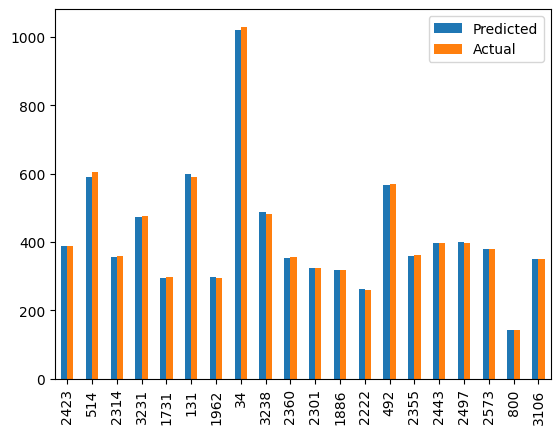

In [28]:
graph.plot(kind='bar')

In [30]:
mse=mean_squared_error(y_test,predicted)
mae=mean_absolute_error(y_test,predicted)
r=r2_score(y_test,predicted)

In [32]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r)

Mean Absolute Error: 2.8595084195245253
Mean Squared Error: 30.520894538137053
R2 Score: 0.9991904826147656
